# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [16]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\JJ\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
# Read your api key environment variable
# YOUR CODE HERE!

api_key = '324454b59ab44371a22416adbac8fc35'

In [18]:
# Create a newsapi client
# YOUR CODE HERE!

from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key = api_key)
newsapi

In [19]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

btc_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy',
                                      )
btc_articles

{'status': 'ok',
 'totalResults': 7142,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Paul Ford',
   'title': 'A Field Guide for Nature-Resistant Nerds',
   'description': 'Yes, yes, the dirt is horrifying. But it’s also how we make bitcoin apps.',
   'url': 'https://www.wired.com/story/a-field-guide-for-nature-resistant-nerds-microchips-climate-change/',
   'urlToImage': 'https://media.wired.com/photos/61086c497b8c62be3062fe82/191:100/w_1280,c_limit/WI090121_MG_Ford_01.jpg',
   'publishedAt': '2021-08-06T11:00:00Z',
   'content': 'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]'},
  {'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Khari Johnson',
   'title': 'Why Not Use Self-Driving Cars as Supercomputers?',
   'description': 'Autonomous vehicles use the equivalent of 200 laptops to 

In [20]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

eth_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy',
                                      )
eth_articles

{'status': 'ok',
 'totalResults': 2419,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Connie Loizos',
   'title': 'Crypto investors like Terraform Labs so much, they’re committing $150 million to its ‘ecosystem’',
   'description': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote about in May. Often, these technologies are seen as so prom…',
   'url': 'http://techcrunch.com/2021/07/16/crypto-investors-like-terraform-labs-so-much-theyre-committing-150-million-to-its-ecosystem/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1174590894.jpg?w=667',
   'publishedAt': '2021-07-16T16:00:55Z',
   'content': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Kille

In [21]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!


def get_sentiment_score(article, based_on):
    sentiments = []
    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                based_on : text,
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos
            })
        except AttributeError:
            pass
    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

In [22]:
btc_sentiment_df = get_sentiment_score(btc_articles, 'content')
btc_sentiment_df

,content,Compound,Negative,Neutral,Positive
0,When my wife started a little garden in our ur...,-0.3400,0.061,0.939,0.000
1,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.000,0.822,0.178
2,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.000,0.873,0.127
3,While retail investors grew more comfortable b...,0.7264,0.000,0.836,0.164
4,"As longtime TechCrunch readers know well, Mich...",0.2732,0.000,0.903,0.097
5,"SINGAPORE, July 28 (Reuters) - Bitcoin broke a...",0.1280,0.075,0.836,0.089
6,James Martin/CNET\r\nA UK man was arrested in ...,-0.4767,0.088,0.912,0.000
7,A representation of virtual currency bitcoin i...,0.0000,0.000,1.000,0.000
8,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,1.000,0.000
9,REUTERS/Dado Ruvic/Illustration\r\nWelcome to ...,0.4588,0.000,0.917,0.083


In [23]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

eth_sentiment_df = get_sentiment_score(eth_articles, 'content')
eth_sentiment_df

,content,Compound,Negative,Neutral,Positive
0,There are many blockchain platforms competing ...,0.3612,0.000,0.925,0.075
1,Blockchain infrastructure startups are heating...,-0.2411,0.061,0.939,0.000
2,While retail investors grew more comfortable b...,0.7264,0.000,0.836,0.164
3,Cent was founded in 2017 as an ad-free creator...,0.6956,0.000,0.810,0.190
4,Representation of the Ethereum virtual currenc...,0.0000,0.000,1.000,0.000
5,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",0.0000,0.000,1.000,0.000
6,Representations of cryptocurrencies Bitcoin an...,0.0000,0.000,1.000,0.000
7,Cryptocurrencies spiked Monday after Amazon li...,0.3400,0.000,0.895,0.105
8,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.000,0.843,0.157
9,Representations of cryptocurrency Ethereum are...,0.0000,0.000,1.000,0.000


In [24]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.00000,20.000000
mean,0.048400,0.046450,0.89415,0.059400
std,0.463778,0.083549,0.09326,0.059611
min,-0.827100,0.000000,0.65300,0.000000
25%,-0.307000,0.000000,0.85325,0.000000
50%,0.000000,0.000000,0.91050,0.056000
75%,0.445000,0.076250,0.95425,0.092500
max,0.726400,0.287000,1.00000,0.178000


In [25]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.00000,20.00000,20.000000
mean,0.174515,0.01345,0.93050,0.056050
std,0.312339,0.02766,0.08117,0.073898
min,-0.340000,0.00000,0.78200,0.000000
25%,0.000000,0.00000,0.84275,0.000000
50%,0.000000,0.00000,0.96950,0.000000
75%,0.402575,0.00000,1.00000,0.129500
max,0.726400,0.07200,1.00000,0.190000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Both are same 0.726400

Q. Which coin had the highest positive score?

A: Ethereum 0.19

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [26]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [29]:
# Instantiate the lemmatizer
# YOUR CODE HERE!

lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

nltk.download('stopwords')

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

sw = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean.lower())
   
        
    # Convert the words to lowercase
    words = [word for word in words if word not in sw]
           
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    return lem

tokenizer(btc_sentiment_df.iloc[0]['content'])

['wife',
 'started',
 'little',
 'garden',
 'urban',
 'backyard',
 'could',
 'think',
 'worm',
 'also',
 'bug',
 'dirt',
 'course',
 'filled',
 'worm',
 'bug',
 'composted',
 'corn',
 'cob',
 '3499',
 'char']

In [35]:
# Create a new tokens column for bitcoin

btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
btc_sentiment_df

,content,Compound,Negative,Neutral,Positive,tokens
0,When my wife started a little garden in our ur...,-0.3400,0.061,0.939,0.000,"[wife, started, little, garden, urban, backyar..."
1,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.000,0.822,0.178,"[like, dogecoin, devotee, mayor, reno, leader,..."
2,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.000,0.873,0.127,"[get, roundup, techcrunchs, biggest, important..."
3,While retail investors grew more comfortable b...,0.7264,0.000,0.836,0.164,"[retail, investor, grew, comfortable, buying, ..."
4,"As longtime TechCrunch readers know well, Mich...",0.2732,0.000,0.903,0.097,"[longtime, techcrunch, reader, know, well, mic..."
5,"SINGAPORE, July 28 (Reuters) - Bitcoin broke a...",0.1280,0.075,0.836,0.089,"[singapore, july, 28, reuters, bitcoin, broke,..."
6,James Martin/CNET\r\nA UK man was arrested in ...,-0.4767,0.088,0.912,0.000,"[james, martincneta, uk, man, arrested, spain,..."
7,A representation of virtual currency bitcoin i...,0.0000,0.000,1.000,0.000,"[representation, virtual, currency, bitcoin, s..."
8,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,1.000,0.000,"[reuters, stafffile, photo, representation, vi..."
9,REUTERS/Dado Ruvic/Illustration\r\nWelcome to ...,0.4588,0.000,0.917,0.083,"[reutersdado, ruvicillustrationwelcome, 10, th..."


In [36]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

eth_sentiment_df['tokens'] = eth_sentiment_df['content'].apply(tokenizer)
eth_sentiment_df

,content,Compound,Negative,Neutral,Positive,tokens
0,There are many blockchain platforms competing ...,0.3612,0.000,0.925,0.075,"[many, blockchain, platform, competing, invest..."
1,Blockchain infrastructure startups are heating...,-0.2411,0.061,0.939,0.000,"[blockchain, infrastructure, startup, heating,..."
2,While retail investors grew more comfortable b...,0.7264,0.000,0.836,0.164,"[retail, investor, grew, comfortable, buying, ..."
3,Cent was founded in 2017 as an ad-free creator...,0.6956,0.000,0.810,0.190,"[cent, founded, 2017, adfree, creator, network..."
4,Representation of the Ethereum virtual currenc...,0.0000,0.000,1.000,0.000,"[representation, ethereum, virtual, currency, ..."
5,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",0.0000,0.000,1.000,0.000,"[hong, kong, aug, 5, reuters, ether, held, nea..."
6,Representations of cryptocurrencies Bitcoin an...,0.0000,0.000,1.000,0.000,"[representation, cryptocurrencies, bitcoin, et..."
7,Cryptocurrencies spiked Monday after Amazon li...,0.3400,0.000,0.895,0.105,"[cryptocurrencies, spiked, monday, amazon, lis..."
8,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.000,0.843,0.157,"[anthony, di, iorio, cofounder, ethereum, netw..."
9,Representations of cryptocurrency Ethereum are...,0.0000,0.000,1.000,0.000,"[representation, cryptocurrency, ethereum, pla..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [37]:
from collections import Counter
from nltk import ngrams

In [39]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

def get_token(df):
    tokens = []
    for i in df['tokens']:
        tokens.extend(i)
    return tokens

btc_tokens = get_token(btc_sentiment_df)
eth_tokens = get_token(eth_sentiment_df)

def bigram_counter(tokens, N):
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count


bigram_btc = bigram_counter(btc_tokens, 2)
bigram_btc

{('wife', 'started'): 1,
 ('started', 'little'): 1,
 ('little', 'garden'): 1,
 ('garden', 'urban'): 1,
 ('urban', 'backyard'): 1,
 ('backyard', 'could'): 1,
 ('could', 'think'): 1,
 ('think', 'worm'): 1,
 ('worm', 'also'): 1,
 ('also', 'bug'): 1,
 ('bug', 'dirt'): 1,
 ('dirt', 'course'): 1,
 ('course', 'filled'): 1,
 ('filled', 'worm'): 1,
 ('worm', 'bug'): 1,
 ('bug', 'composted'): 1,
 ('composted', 'corn'): 1,
 ('corn', 'cob'): 1,
 ('cob', '3499'): 1,
 ('3499', 'char'): 1,
 ('char', 'like'): 1,
 ('like', 'dogecoin'): 1,
 ('dogecoin', 'devotee'): 1,
 ('devotee', 'mayor'): 1,
 ('mayor', 'reno'): 1,
 ('reno', 'leader'): 1,
 ('leader', 'el'): 1,
 ('el', 'salvador'): 1,
 ('salvador', 'aldo'): 1,
 ('aldo', 'baoicchi'): 1,
 ('baoicchi', 'convinced'): 1,
 ('convinced', 'cryptocurrency'): 1,
 ('cryptocurrency', 'future'): 1,
 ('future', 'ceo'): 1,
 ('ceo', 'founder'): 1,
 ('founder', 'canadian'): 1,
 ('canadian', 'scooter'): 1,
 ('scooter', 'maker'): 1,
 ('maker', 'daymak'): 1,
 ('daymak', 'b

In [40]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

bigram_eth = bigram_counter(eth_tokens, 2)
bigram_eth

{('many', 'blockchain'): 1,
 ('blockchain', 'platform'): 1,
 ('platform', 'competing'): 1,
 ('competing', 'investor'): 1,
 ('investor', 'developer'): 1,
 ('developer', 'attention'): 1,
 ('attention', 'right'): 1,
 ('right', 'big'): 1,
 ('big', 'daddy'): 1,
 ('daddy', 'ethereum'): 1,
 ('ethereum', 'socalled'): 1,
 ('socalled', 'ethereum'): 1,
 ('ethereum', 'killer'): 1,
 ('killer', 'like'): 1,
 ('like', 'solana'): 1,
 ('solana', 'wrote'): 1,
 ('wrote', '2563'): 1,
 ('2563', 'char'): 1,
 ('char', 'blockchain'): 1,
 ('blockchain', 'infrastructure'): 1,
 ('infrastructure', 'startup'): 1,
 ('startup', 'heating'): 1,
 ('heating', 'industry'): 1,
 ('industry', 'fervor'): 1,
 ('fervor', 'brings'): 1,
 ('brings', 'developer'): 1,
 ('developer', 'user'): 1,
 ('user', 'space'): 1,
 ('space', 'still'): 1,
 ('still', 'feel'): 1,
 ('feel', 'extremely'): 1,
 ('extremely', 'young'): 1,
 ('young', 'despite'): 1,
 ('despite', 'heavy'): 1,
 ('heavy', 'institutional'): 1,
 ('institutional', 'embrace'): 1,

In [41]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [42]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(btc_tokens, 10)

[('char', 19),
 ('bitcoin', 10),
 ('reuters', 7),
 ('reutersdado', 6),
 ('july', 5),
 ('2021', 5),
 ('illustration', 5),
 ('taken', 5),
 ('attack', 5),
 ('representation', 4)]

In [43]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

token_count(eth_tokens, 10)

[('char', 20),
 ('ethereum', 15),
 ('2021', 8),
 ('representation', 7),
 ('illustration', 6),
 ('reuters', 6),
 ('cryptocurrencies', 5),
 ('reutersdado', 5),
 ('taken', 5),
 ('blockchain', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

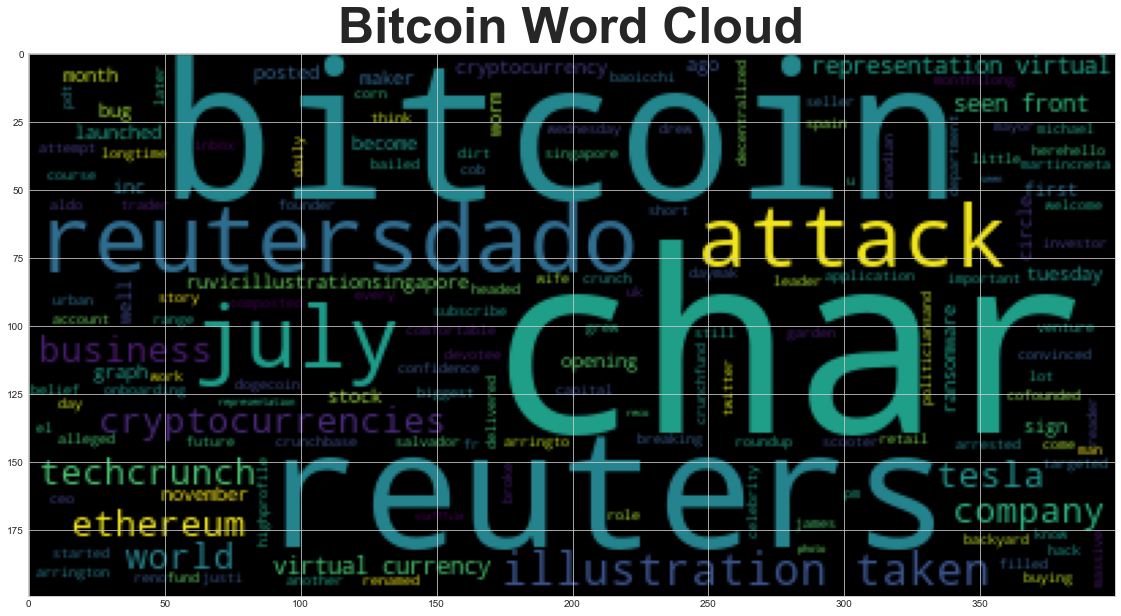

In [45]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

wc = WordCloud().generate(' '.join(btc_tokens))
plt.title("Bitcoin Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(wc)

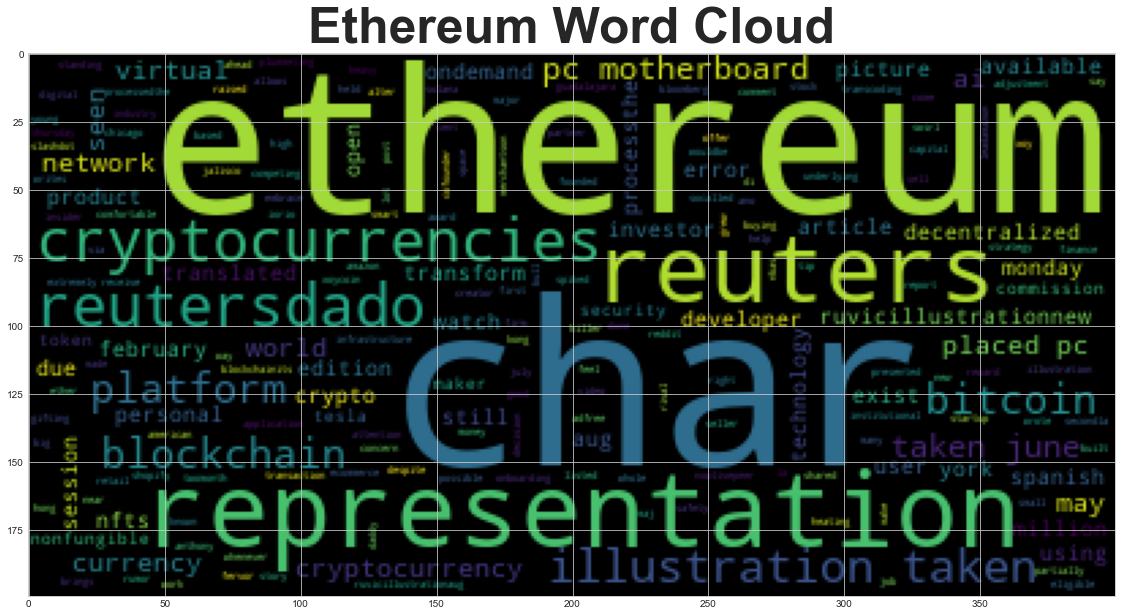

In [46]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

wc = WordCloud().generate(' '.join(eth_tokens))
plt.title("Ethereum Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [47]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [48]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [49]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

btc_content = ' '.join(btc_sentiment_df['content'])
btc_content

"When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars] Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars] To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.\r\nHello and welcome to Daily Crunch for July 23, 2021. Its been an i… [+5456 chars] While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars] As longtime TechCrunch readers know well, Michael Arrington cofounded TechCrunch and Crunchbase, as well as the venture fund CrunchFund, 

In [50]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

doc = nlp(btc_content)

# Add a title to the document
# YOUR CODE HERE!

doc.user_data["title"] = "BITCOIN NER"

In [51]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(doc, style='ent')

In [52]:
# List all Entities
# YOUR CODE HERE!

for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
SINGAPORE GPE
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
James Martin/CNET PERSON
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/IllustrationSINGAPORE ORG
July 21 DATE
Reuters ORG
Reuters ORG
FILE ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration
SINGAPORE ORG
REUTERS ORG
Dado Ruvic/Illustration
Welcome PERSON
10 CARDINAL
the Opening Bell ORG
first ORDINAL
Entrepreneur ORG
first ORDINAL
more than three decades ago DATE
six months ago DATE
dozens CARDINAL
February 9, 2021 DATE
REUTERS ORG
Dado GPE
Reuters ORG
Tesla Inc ORG
2020 DATE
Kaseya PERSON
Russian NORP
hundreds CARDINAL
Concord Acquisition Corp ORG
SPAC ORG
LONDON GPE
July 

---

### Ethereum NER

In [53]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

eth_content = ' '.join(eth_sentiment_df['content'])
eth_content

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars] Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars] While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars] Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars] Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUT

In [54]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

doc = nlp(eth_content)

# Add a title to the document
# YOUR CODE HERE!

doc.user_data["title"] = "Ethereum NER"

In [55]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(doc, style='ent')

In [57]:
# List all Entities
# YOUR CODE HERE!

for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
2017 DATE
Reddit NORP
Ethereum PERSON
Ethereum PERSON
February 3, 2018 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 5 DATE
Reuters ORG
HONG KONG GPE
Aug 5 DATE
Reuters ORG
two-month DATE
Thursday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Monday DATE
Amazon ORG
Amazon ORG
Anthony Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
Livepeer PERSON
$20 million MONEY
Ethereum PERSON
Spanish NORP
AI ORG
Xoy Capital PERSON
Guadalajara GPE
Jalisco GPE
Xoycoin PERSON
Monday DATE
Chicago Bulls ORG
American Express ORG
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DATE
Clie PERSON
Polygon ORG
$100 million MONEY
June 29, 2021 DATE
REUTERS ORG
D

---